In [ ]:
import cv2
import matplotlib.pyplot as plt
from skimage import io
from google.colab.patches import cv2_imshow

<function skimage.io._io.show()>

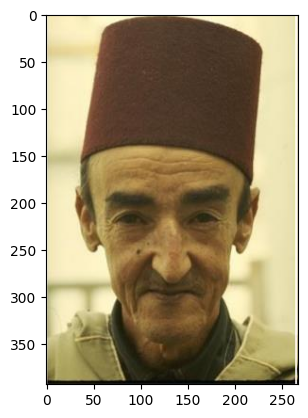

In [ ]:
image = cv2.imread("images/old.jpeg")
original_image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
io.imshow_collection([original_image])
io.show

**1. Generating a black-and-white sketch**

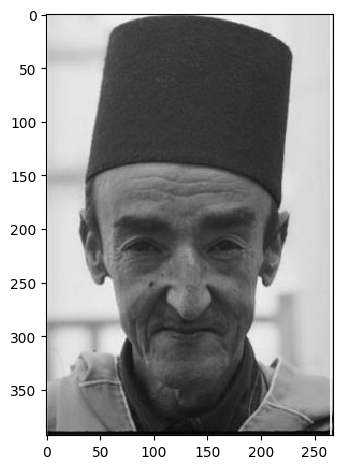

In [ ]:
gray_image = cv2.cvtColor(original_image,cv2.COLOR_BGR2GRAY)
io.imshow(gray_image)

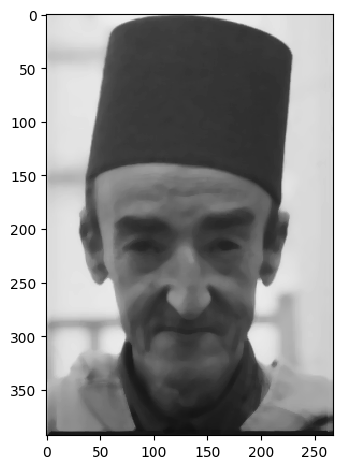

In [ ]:
## Median Filter
median_image = cv2.medianBlur(gray_image,7)
io.imshow(median_image)

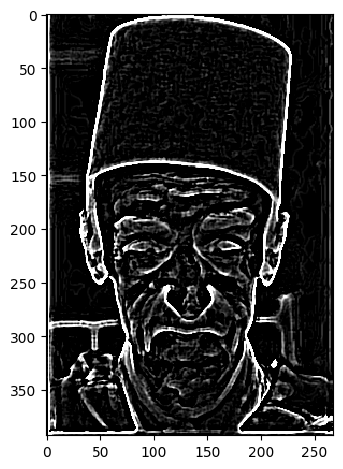

In [ ]:
## Laplacian Filter
laplacian_image = cv2.Laplacian(median_image,cv2.CV_8U,ksize=5)
io.imshow(laplacian_image)

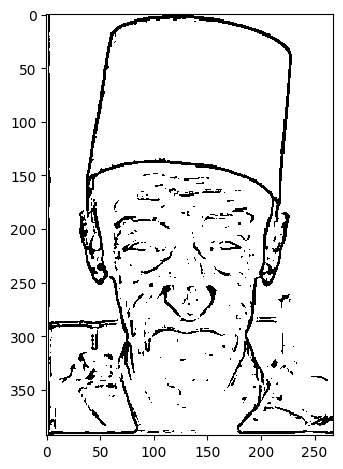

In [ ]:
x,thresholding_image = cv2.threshold(laplacian_image,125,255,cv2.THRESH_BINARY_INV,7)
io.imshow(thresholding_image)

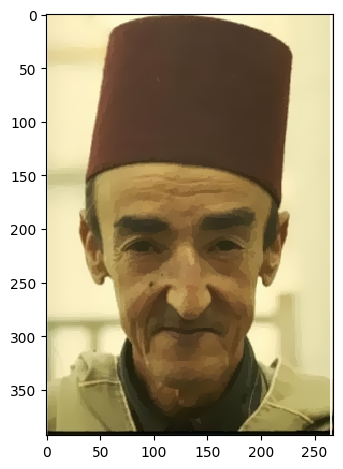

In [ ]:
bilateral_image= original_image
for i in range(5):
     bilateral_image = cv2.bilateralFilter(bilateral_image,d=9,sigmaColor=9,sigmaSpace=7)
io.imshow(bilateral_image)

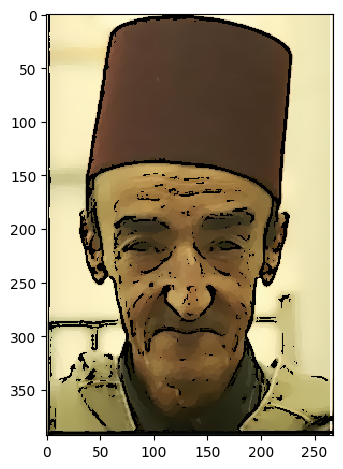

In [ ]:
cartoon_image = cv2.bitwise_and(bilateral_image,cv2.cvtColor(thresholding_image,cv2.COLOR_GRAY2BGR))
io.imshow(cartoon_image)

In [ ]:
def cartoonify(IMAGE_PATH):
  image = cv2.imread(IMAGE_PATH)
  original_image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)


  gray_image = cv2.cvtColor(original_image,cv2.COLOR_BGR2GRAY)

  median_image = cv2.medianBlur(gray_image,7)

  laplacian_image = cv2.Laplacian(median_image,cv2.CV_8U,ksize=5)

  x,thresholding_image = cv2.threshold(laplacian_image,125,255,cv2.THRESH_BINARY_INV,7)

  bilateral_image= original_image
  for i in range(7):
     bilateral_image = cv2.bilateralFilter(bilateral_image,d=9,sigmaColor=9,sigmaSpace=7)

  cartoon_image = cv2.bitwise_and(bilateral_image,cv2.cvtColor(thresholding_image,cv2.COLOR_GRAY2BGR))
  io.imshow_collection([original_image, cartoon_image])



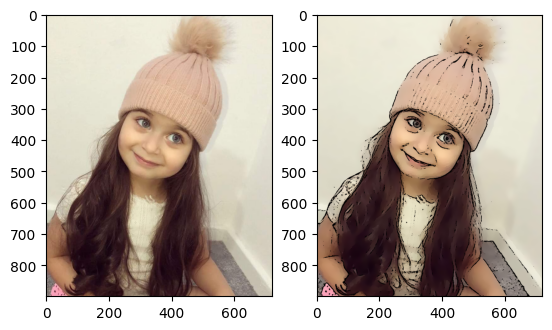

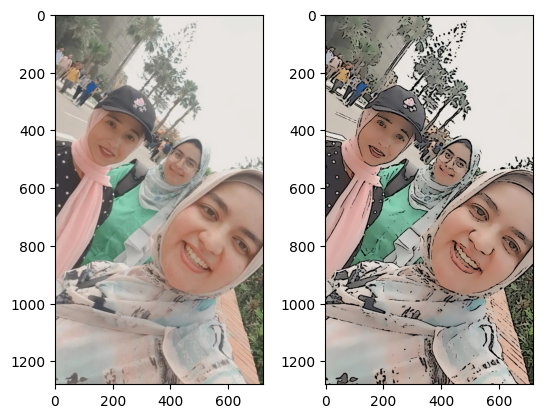

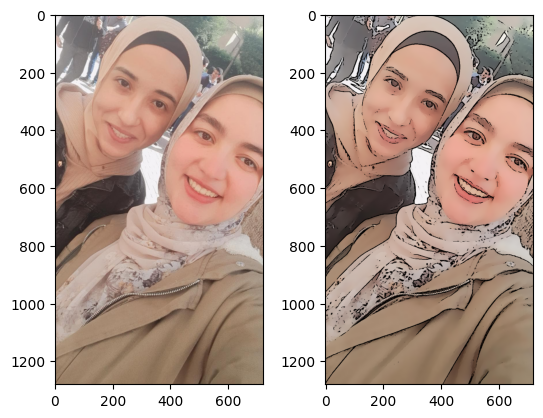

In [ ]:
cartoonify("images/1.jpeg")

cartoonify("images/2.jpeg")

cartoonify("images/3.jpeg")
